In [1]:
import tensorflow_core as tf
import numpy as np
import matplotlib.pyplot as plt

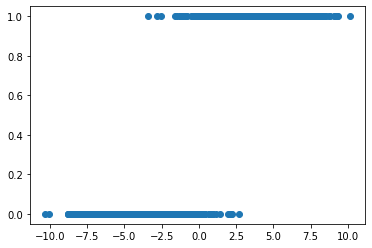

In [2]:
learning_rate = 0.01
training_epochs = 1000

def sigmoid(x): # helper  calculate sigmoid
    return 1. / (1. + np.exp(-x))

x1 = np.random.normal(-4, 2, 1000)
x2 = np.random.normal(4, 2, 1000)
xs = np.append(x1, x2)
ys = np.array([0.] * len(x1) + [1.] * len(x2))

plt.scatter(xs, ys)

In [3]:
X = tf.placeholder(tf.float32, shape=(None), name="x")
Y = tf.placeholder(tf.float32, shape=(None), name="y")

def model(X, w):  # sigmoid model
    return tf.div(
        1.,
        tf.add(1., tf.exp(-1 * (X * w[1]) + w[0])),
    )

w = tf.Variable([0., 0.], name="parameter", trainable=True)
y_model = model(X, w)

cost = tf.reduce_mean(-Y * tf.log(y_model) - (1 - Y) * tf.log(1 - y_model))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

prev_err = 0
for epoch in range(training_epochs):
    err, _ = sess.run([cost, train_op], feed_dict={X: xs, Y: ys})

    if abs(prev_err - err) < 0.0001: 
        break
    prev_err = err

w_val = sess.run(w)

sess.close()

print("===== DONE TRAINING =====")

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
===== DONE TRAINING =====


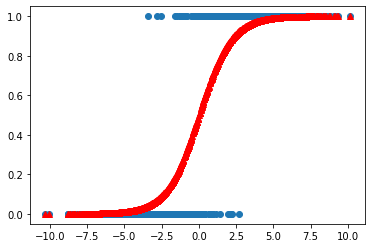

In [4]:
plt.scatter(xs, ys)
plt.plot(xs, sigmoid((xs * w_val[1]) + w_val[0]), 'r^')
plt.show()